<a href="https://colab.research.google.com/github/deadlysixx/Projeto-de-Transfer-Learning-em-Python-/blob/main/notebooks/transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto_de_Transfer_Learning_em_Python.ipynb

In [259]:
%matplotlib inline

import os
import random
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from six.moves import urllib
import gzip

from shutil import copyfile

# import the needed packages
# import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

In [260]:
# Baixando o conjunto de dados de cães e gatos

!echo "Downloading catsanddogs for image notebooks"
!curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip #download

# As instruções para preparar o conjunto de dados são para Linux ou macOS

!unzip kagglecatsanddogs_5340.zip
!rm kagglecatsanddogs_5340.zip
!ls

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  
  inflating: PetImages/Dog/55

In [261]:
# exibindo a quantidade de imagem

print(len(os.listdir('/content/PetImages/Cat')))
print(len(os.listdir('/content/PetImages/Dog')))


12501
12501


In [262]:
# Crinando diretórios para separar as imagens em Treino e Teste

try:
    os.mkdir('cats-v-dogs')
    os.mkdir('cats-v-dogs/training')
    os.mkdir('cats-v-dogs/testing')
    os.mkdir('cats-v-dogs/training/cats')
    os.mkdir('cats-v-dogs/training/dogs')
    os.mkdir('cats-v-dogs/testing/cats')
    os.mkdir('cats-v-dogs/testing/dogs')
except OSError:
    pass


In [263]:
#  Função para separar o conjunto de dados em treino, validação e teste
#  Limpando as imagens com comprimento zero

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, TRAIN_SPLIT, VAL_SPLIT):
    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    num_files = len(files)
    random.shuffle(files) # Randomizando arquivos

    train_length = int(num_files * TRAIN_SPLIT)
    val_length = int(num_files * VAL_SPLIT)
    test_length = num_files - train_length - val_length

    training_set = files[0:train_length]
    validation_set = files[train_length:train_length + val_length]
    testing_set = files[train_length + val_length:]


    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(VALIDATION, filename)
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TESTING, filename)
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "PetImages/Cat/"
DOG_SOURCE_DIR = "PetImages/Dog/"

TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
VALIDATION_CATS_DIR = "cats-v-dogs/validation/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"

TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
VALIDATION_DOGS_DIR = "cats-v-dogs/validation/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

# Criando diretórios válidos
try:
    os.mkdir('cats-v-dogs/validation')
    os.mkdir('cats-v-dogs/validation/cats')
    os.mkdir('cats-v-dogs/validation/dogs')
except OSError:
    pass

train_split = 0.7
val_split = 0.15
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, TESTING_CATS_DIR, train_split, val_split)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, TESTING_DOGS_DIR, train_split, val_split)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [264]:
# Exibindo a quantidade de imagem por diretórios


print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

11367
11383
3481
3484


In [265]:
# Define e move para o diretório do dataset
# os.chdir(datasetdir) # Removed os.chdir

# atalho para a classe ImageDataGenerator
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

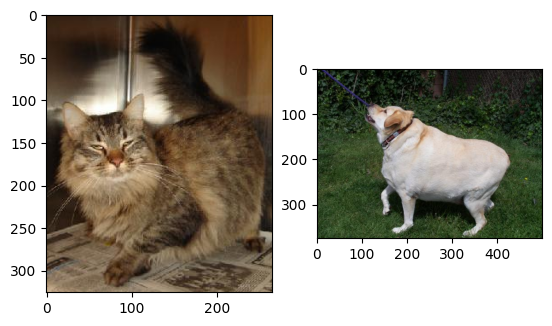

In [268]:
plt.subplot(1,2,1)
plt.imshow(img.imread('/content/PetImages/Cat/665.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('/content/PetImages/Dog/11703.jpg'))

In [270]:
images = []
for i in range(10):
  try:
    # Corrected path and filename formatting
    im = img.imread('/content/PetImages/Cat/{}.jpg'.format(660 + i))
    images.append(im)
    print('image shape', im.shape, 'maximum color level', im.max())
  except FileNotFoundError:
    print(f"Image /content/PetImages/Cat/{660 + i}.jpg not found, skipping.")
  except Exception as e:
    print(f"Could not read image /content/PetImages/Cat/{660 + i}.jpg: {e}")

image shape (346, 259, 4) maximum color level 255
image shape (245, 368, 3) maximum color level 255
image shape (375, 500, 3) maximum color level 255
image shape (360, 480, 3) maximum color level 255
image shape (200, 75, 3) maximum color level 234
image shape (326, 265, 3) maximum color level 255
Could not read image /content/PetImages/Cat/666.jpg: cannot identify image file '/content/PetImages/Cat/666.jpg'
image shape (375, 500, 3) maximum color level 239
image shape (375, 500, 3) maximum color level 255
image shape (375, 500, 3) maximum color level 255


In [271]:
# função auxiliar para carregar a imagem e devolvê-la e inserir o vetor
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


In [272]:
gen = ImageDataGenerator()

In [278]:
iterator = gen.flow_from_directory(
    "/content/cats-v-dogs/training/", # Use the training directory
    target_size=(256,256),
    classes=('Dog','Cat')
)

Found 0 images belonging to 2 classes.


In [279]:
# podemos adivinhar que o iterador tem uma próxima função,
# porque todos os iteradores python têm um.

batch = next(iterator)
len(batch)

2

In [280]:
# Verificando os tipos de lote dos dois elementos

print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [282]:
# Imprimindo a forma e o tipo das duas matrizes numpy.

print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(0, 256, 256, 3)
float32


ValueError: zero-size array to reduction operation maximum which has no identity

In [283]:
# precisamos converter o array de imagens para inteiros
# antes de plotar como imshow ou pega arrays de inteiros,
# ou arrays de floats normalizados para 1.

plt.imshow(batch[0][0].astype(int))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [284]:
batch[1][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [285]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(int))
      assert(label[0]+label[1]==1.)
      categ = 'Dog' if label[0]>0.5 else 'Cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

In [286]:
plot_images(next(iterator))

<Figure size 1080x2160 with 0 Axes>

In [287]:
# Dividindo as amostras de treinamento e validação com ImageDataGenerator

imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.2, # Apply validation_split to the training data
)

In [288]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    # Removed subset argument
)

VALIDATION_DIR = "/content/cats-v-dogs/validation/" # Changed to validation directory
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    # Removed subset argument
)

TESTING_DIR = "/content/cats-v-dogs/testing/" # Changed to testing directory
test_dataset = imgdatagen.flow_from_directory(
    TESTING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    shuffle=False # Usually no need to shuffle testing data
)

Found 22748 images belonging to 2 classes.
Found 6887 images belonging to 2 classes.
Found 6964 images belonging to 2 classes.


In [289]:
# rede neural convolucional simples
# As redes neurais convolucionais profundas são a escolha certa quando se trata de classificar imagens

model = keras.models.Sequential()

initializers = {

}
model.add(
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3),
        activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        48, 5, activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        96, 5, activation='relu',
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 252, 252, 24)   │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 126, 126, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 122, 122, 48)   │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 61, 61, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 57, 57, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │       623,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [290]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [292]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=10,
)

Epoch 1/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 4583s 2s/step - acc: 0.6729 - loss: 0.6020 - val_acc: 0.7678 - val_loss: 0.4932
Epoch 2/10
 135/2844 ━━━━━━━━━━━━━━━━━━━━ 1:09:27 2s/step - acc: 0.7823 - loss: 0.5037

KeyboardInterrupt: 

In [293]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)

    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

    plt.show()

In [294]:
plot_history(history, (0.65, 1.))

NameError: name 'history' is not defined

In [295]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    horizontal_flip = True,
    validation_split = 0.2,
)

In [296]:
image = None
try:
    image = img.imread('Cat/12.jpg')
except Exception as e:
    print(f"Could not read image Cat/12.jpg: {e}")

def plot_transform():
    '''apply the transformation 8 times randomly'''
    if image is None:
        print("Image not loaded, cannot plot transformations.")
        return

    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols):
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')

plot_transform()

Could not read image Cat/12.jpg: [Errno 2] No such file or directory: 'Cat/12.jpg'
Image not loaded, cannot plot transformations.


In [297]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    horizontal_flip = True,
    zoom_range = 0.3,
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()


Image not loaded, cannot plot transformations.


In [298]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    # Removed subset argument
)

VALIDATION_DIR = "/content/cats-v-dogs/validation/" # Changed to validation directory
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    # Removed subset argument
)

TESTING_DIR = "/content/cats-v-dogs/testing/" # Changed to testing directory
test_dataset = imgdatagen.flow_from_directory(
    TESTING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    shuffle=False
)

Found 22748 images belonging to 2 classes.
Found 6887 images belonging to 2 classes.
Found 6964 images belonging to 2 classes.


In [299]:
model = keras.models.Sequential()

initializers = {

}
model.add(
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3),
        activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        48, 5, activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        96, 5, activation='relu',
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 252, 252, 24)   │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 126, 126, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 122, 122, 48)   │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 61, 61, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 57, 57, 96)     │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 311904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │       623,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [300]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [301]:
history_augm = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=40,
)

Epoch 1/40
   6/2844 ━━━━━━━━━━━━━━━━━━━━ 1:13:25 2s/step - acc: 0.4573 - loss: 1.1320

KeyboardInterrupt: 

In [302]:
plot_history(history_augm, (0.65, 1))

NameError: name 'history_augm' is not defined

In [303]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [304]:
def evaluate(img_fname):
    img = keras.preprocessing.image.load_img(img_fname, target_size=(224, 224))
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    # print the probability and category name for the 5 categories
    # with highest probability:
    print('Predicted:', decode_predictions(preds, top=5)[0])
    plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted: [('n02102040', 'English_springer', np.float32(0.21976335)), ('n02100236', 'German_short-haired_pointer', np.float32(0.17048413)), ('n02093428', 'American_Staffordshire_terrier', np.float32(0.1004294)), ('n02107574', 'Greater_Swiss_Mountain_dog', np.float32(0.08420563)), ('n02099712', 'Labrador_retriever', np.float32(0.079259425))]


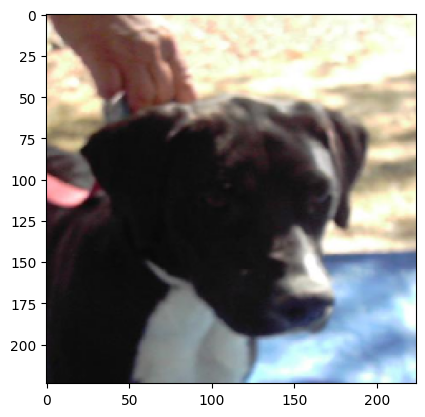

In [305]:
evaluate('/content/PetImages/Dog/10007.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted: [('n02099712', 'Labrador_retriever', np.float32(0.3097568)), ('n02109047', 'Great_Dane', np.float32(0.20241112)), ('n02099267', 'flat-coated_retriever', np.float32(0.1111893)), ('n02107142', 'Doberman', np.float32(0.047583085)), ('n02089078', 'black-and-tan_coonhound', np.float32(0.039062396))]


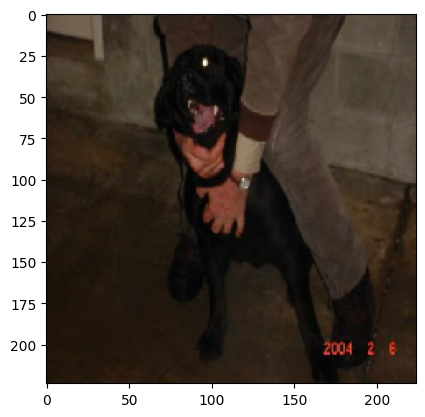

In [306]:
evaluate('/content/PetImages/Dog/10188.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted: [('n02096437', 'Dandie_Dinmont', np.float32(0.77786124)), ('n02098413', 'Lhasa', np.float32(0.12935972)), ('n02097474', 'Tibetan_terrier', np.float32(0.029770674)), ('n02093754', 'Border_terrier', np.float32(0.01458213)), ('n02113712', 'miniature_poodle', np.float32(0.013672776))]


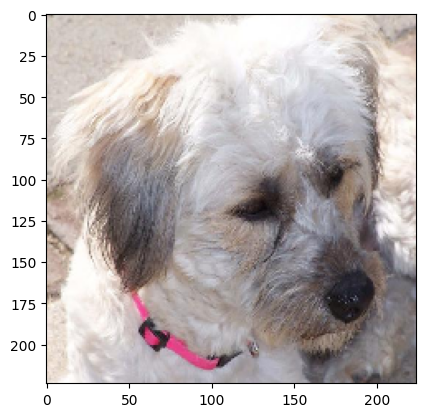

In [307]:
evaluate('/content/PetImages/Dog/1014.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Predicted: [('n02094258', 'Norwich_terrier', np.float32(0.30403465)), ('n02085620', 'Chihuahua', np.float32(0.13596778)), ('n02113186', 'Cardigan', np.float32(0.097443506)), ('n02123045', 'tabby', np.float32(0.08979451)), ('n02113023', 'Pembroke', np.float32(0.032907497))]


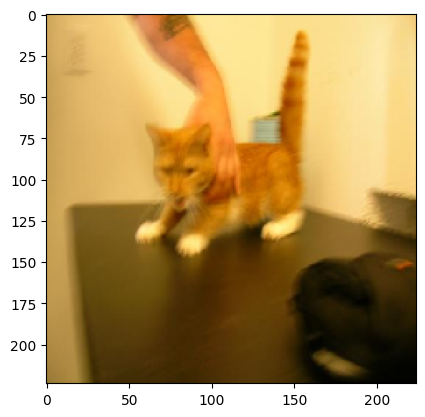

In [308]:
evaluate('/content/PetImages/Cat/0.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted: [('n02123045', 'tabby', np.float32(0.7254261)), ('n02123159', 'tiger_cat', np.float32(0.16143388)), ('n02124075', 'Egyptian_cat', np.float32(0.08034066)), ('n03958227', 'plastic_bag', np.float32(0.003467183)), ('n02127052', 'lynx', np.float32(0.0034142663))]


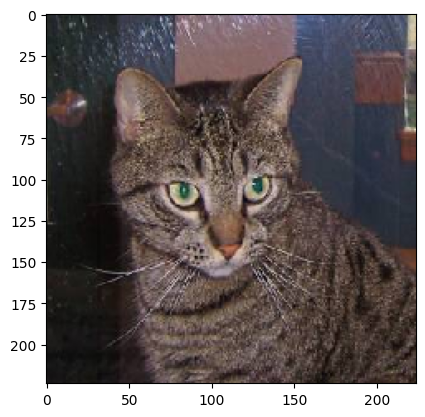

In [309]:
evaluate('/content/PetImages/Cat/1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Predicted: [('n02106662', 'German_shepherd', np.float32(0.2668658)), ('n03803284', 'muzzle', np.float32(0.26612723)), ('n02113023', 'Pembroke', np.float32(0.13620698)), ('n02109047', 'Great_Dane', np.float32(0.07119751)), ('n02114712', 'red_wolf', np.float32(0.04037652))]


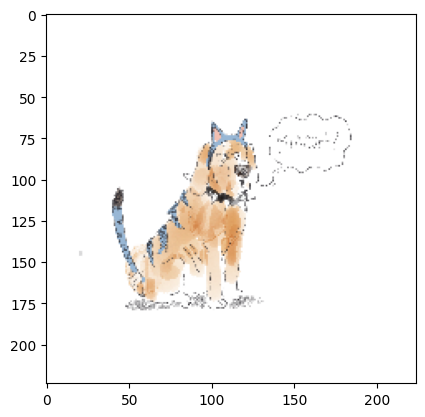

In [310]:
# download the image from my github repository
import urllib.request as req
url = 'https://raw.githubusercontent.com/cbernet/maldives/master/dogs_vs_cats/datafrog_chien_chat.png'
req.urlretrieve(url, 'dog_cartoon.jpg')

evaluate('dog_cartoon.jpg')